# <font color=blue>1. Coleta dos Dados</font>
<img src='imagem.png' alt='Logo' style='width:20000000px;'/>


### <font color=red>Utilizou-se o Google Analytics para adquirir os dados</font>

# <font color=blue>2. Preparação, limpeza e Transformação dos Dados - Data Wrangling/Munging</font>

In [1]:
## Importando os pacotes de análise de dados - PYTHON OPEN DATA SCIENCE STACK
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lendo o Microsoft Excel em formato Comma Separated Values (.csv) com as respostas do questionário
# e importando para o formato tabular do pacote Pandas
df = pd.read_csv("Questionario.csv")
df.head()

,Carimbo de data/hora,Pontuação total,1.1 - Idade,1.1 - Idade [Pontuação],1.1 - Idade [Feedback],1.2 - Sexo,1.2 - Sexo [Pontuação],1.2 - Sexo [Feedback],1.3 - Habilitações Académicas,1.3 - Habilitações Académicas [Pontuação],...,3 - Recomendaria este questionário a alguém?,3 - Recomendaria este questionário a alguém? [Pontuação],3 - Recomendaria este questionário a alguém? [Feedback],4 - Terá mais atenção agora quando for ler uma notícia?,4 - Terá mais atenção agora quando for ler uma notícia? [Pontuação],4 - Terá mais atenção agora quando for ler uma notícia? [Feedback],Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,2019/04/18 3:23:12 PM GMT+1,69.00 / 100,< 18,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,4.0,3.0,1.0,2.0
1,2019/04/18 4:16:38 PM GMT+1,58.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,2.0,4.0,3.0
2,2019/04/18 4:24:54 PM GMT+1,63.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,4.0,1.0,2.0
3,2019/04/18 11:25:06 PM GMT+1,64.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Licenciatura,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,NaN,NaN,NaN,NaN
4,2019/04/24 12:47:30 AM GMT+1,57.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Não,-- / 0,NaN,Não,0.00 / 1,NaN,NaN,NaN,NaN,NaN


In [3]:
# Organizando os dados para uma melhor análise, excluíndo aqueles que não foram considerados relevantes
# Eliminadno colunas desnecessárias
for x in df:
    if ("[Pontuação]" in x):
        df = df.drop(x, 1)
    elif ("[Feedback]" in x):
        df = df.drop(x, 1)
    elif ("Unnamed" in x):
        df = df.drop(x, axis=1)
    elif ("Carimbo de data/hora" == x):
        df = df.drop(x, axis=1)
        
# Eliminando linhas de teste
for y in range(0, 4):
    df = df.drop(y)
df = df.drop(7)

# Renomeando linhas
df.index = list(range(1,201))
df.head()

,Pontuação total,1.1 - Idade,1.2 - Sexo,1.3 - Habilitações Académicas,1.4 - Curso a frequentar,2.1 - Tem acesso à Internet em casa?,2.2 - Costuma utilizar a Internet noutro lugar?,2.3 - Qual é o meio que mais utiliza para estar a par das notícias?,"2.4 - Sabe o que significa ""Fake News""?","2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?",...,"2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?",2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Fiabilidade],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Relevância],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Atualização],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Completa],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Explicita],1 - Achou este questionário útil?,"2 - Achou o preenchimento deste questionário acessível em termos de clareza, precisão e tempo?",3 - Recomendaria este questionário a alguém?,4 - Terá mais atenção agora quando for ler uma notícia?
1,57.00 / 100,18-25,Masculino,Ensino Secundário,MIEIC,Sim,Sim,Redes Sociais,Sim,“Fake News” são informações fabricadas que imi...,...,Frequentemente,4º,5º,3º,1º,2º,Não,Não,Não,Não
2,75.00 / 100,18-25,Masculino,Mestrado,MIEEC,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Raramente,5º,2º,1º,3º,4º,Sim,Sim,Sim,Sim
3,80.00 / 100,18-25,Masculino,Licenciatura,Mestrado em Multimedia,Sim,Sim,Jornais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,2º,4º,3º,5º,Sim,Sim,Sim,Sim
4,77.00 / 100,18-25,Masculino,Ensino Secundário,Mestrado Integrado em Bioengenharia,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,5º,4º,2º,3º,Sim,Sim,Não,Sim
5,38.00 / 100,18-25,Masculino,Mestrado,Mestrado em Engenharia Civil,Sim,Sim,Televisão,Sim,“Fake News” são informações fabricadas que imi...,...,Raramente,5º,3º,4º,1º,2º,Sim,Sim,Sim,Sim


# <font color=blue>2. Visualização dos Dados - 1º Fase</font>

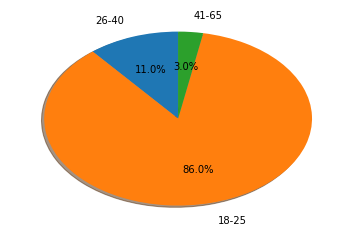

In [55]:
# Pergunta 1.1
# Calcular as categorias e suas frequências
idades = ["26-40","18-25", "41-65"]
frequencia = []
for x in idades:
    mask = df["1.1 - Idade"] == x
    df1 = df[mask]
    df2 = df1["1.1 - Idade"]
    df3 = df2.count()
    frequencia.append(df3)

# Visualizando a pergunta 1.1 num gráfico circular
plt.pie(frequencia, labels = idades, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.show()

### <font color=red>Note-se que não existem as restantes categorias, pelo que a sua frequência é 0</font>